# K MEAN Clustering

In [1]:
import pandas as pd
from pylab import rcParams
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import datetime as dt
import sklearn
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

### Import data

In [2]:
mallcustdf = pd.read_csv(r"D:\SEMESTER3\UAS Takehome\IS388\B_IS388_Theory_ChristopherDarren_00000054804\Mall_Customers.csv", sep=",")
mallcustdf.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mallcustdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mallcustdf.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
mallcustdf.shape

(200, 5)

# EDA

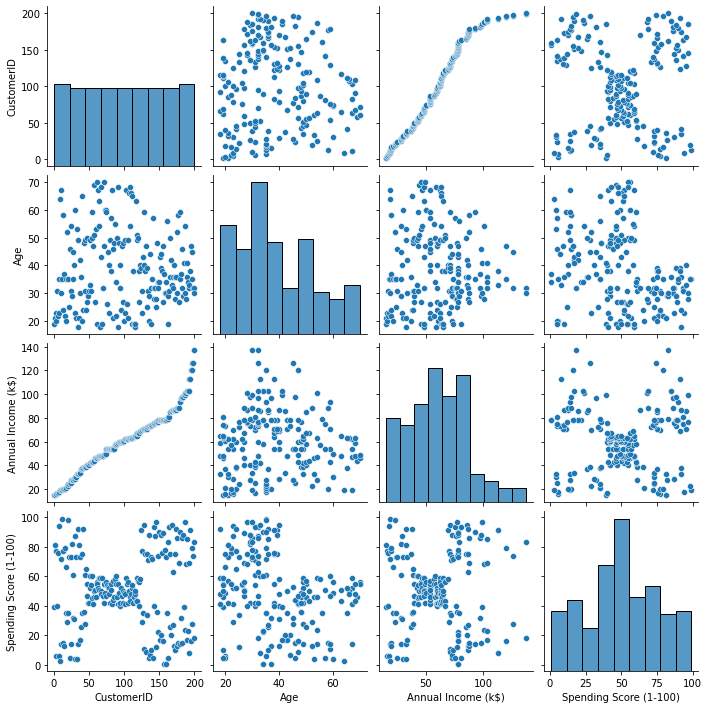

In [6]:
sns.pairplot(mallcustdf)

C:\Users\Darren\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

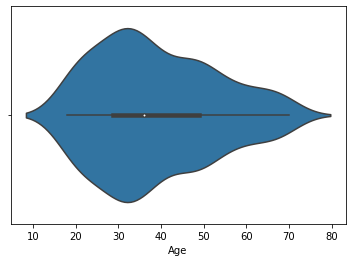

In [7]:
sns.violinplot(mallcustdf['Age'])

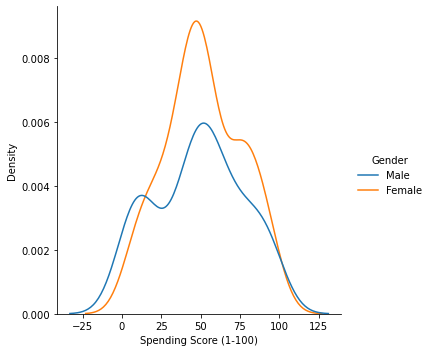

In [8]:
sns.displot(mallcustdf, x="Spending Score (1-100)", hue="Gender", kind="kde")

<AxesSubplot:>

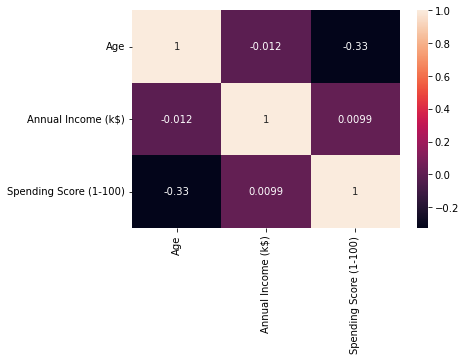

In [9]:
sns.heatmap(mallcustdf[['Age','Annual Income (k$)','Spending Score (1-100)']].corr(), annot=True)

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Gender'>

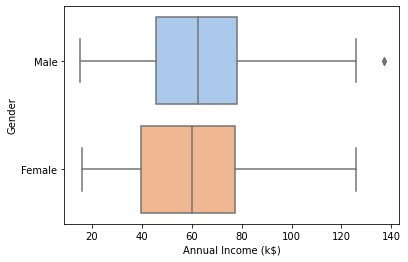

In [10]:
colors = sns.color_palette('pastel')
sns.boxplot(x="Annual Income (k$)", y="Gender", data=mallcustdf, palette=colors)

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

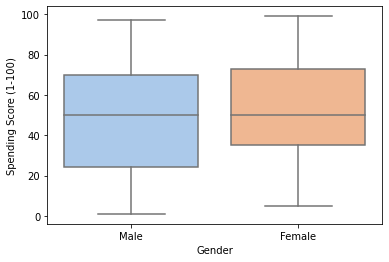

In [11]:
colors = sns.color_palette('pastel')
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=mallcustdf, palette=colors)

## Data preprocessing

In [12]:
mallcustdf.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
x = mallcustdf.iloc[:,3:5].values

In [14]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

## menggunakan elbow method untuk menemukan angka optimal untuk cluster ( nilai K nya)

In [15]:
wcss =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10,random_state=101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Darren\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


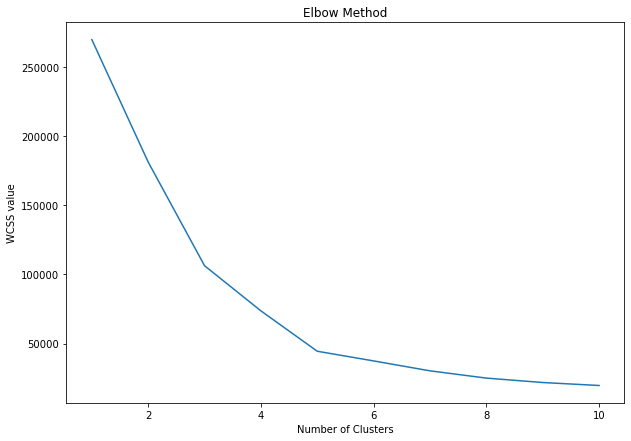

In [16]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS value")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10,random_state=101)
y_pred= kmeans.fit_predict(x)

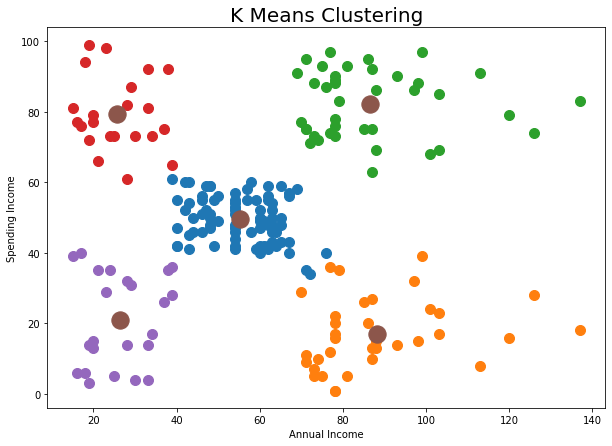

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_pred==0,0],x[y_pred ==0,1], s=100)
plt.scatter(x[y_pred==1,0],x[y_pred ==1,1], s=100)
plt.scatter(x[y_pred==2,0],x[y_pred ==2,1], s=100)
plt.scatter(x[y_pred==3,0],x[y_pred ==3,1], s=100)
plt.scatter(x[y_pred==4,0],x[y_pred ==4,1], s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)

plt.title('K Means Clustering', fontsize =20)
plt.xlabel("Annual Income")
plt.ylabel("Spending Income")
plt.show()

# perbandingan visualisasi dengan DBSCAN

In [19]:
model = DBSCAN(eps=5, min_samples=5)

In [20]:
y_pred1= model.fit_predict(x)

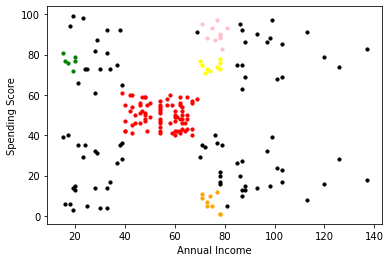

In [21]:
plt.scatter(x[y_pred1==-1, 0], x[y_pred1==-1,1],s=10, c="black")

plt.scatter(x[y_pred1==0, 0], x[y_pred1==0,1],s=10, c="green")
plt.scatter(x[y_pred1==1, 0], x[y_pred1==1,1],s=10, c="red")
plt.scatter(x[y_pred1==2, 0], x[y_pred1==2,1],s=10, c="yellow")
plt.scatter(x[y_pred1==3, 0], x[y_pred1==3,1],s=10, c="orange")
plt.scatter(x[y_pred1==4, 0], x[y_pred1==4,1],s=10, c="pink")
plt.scatter(x[y_pred1==5, 0], x[y_pred1==5,1],s=10, c="blue")
plt.scatter(x[y_pred1==6, 0], x[y_pred1==6,1],s=10, c="brown")

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()